# Dataset description
This dataset consists of12 columns:
'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Outlet_Sales'


In [203]:
# importing libraries for data analysis
import pandas as pd
import numpy as np
# importing libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [204]:
#  reading the csv file and setting the column 'Id' as the index
df=pd.read_csv('Train.csv')
# df=df.drop(column=[''])- to delete a column
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory data analysis

In [205]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [207]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [208]:
#categorical attributes
categories=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        categories.append(x)
categories

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [209]:
categories.remove('Item_Identifier')
categories.remove('Outlet_Identifier')
print(categories)

['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [210]:
for i in categories:
    print(i)
    print(df[i].value_counts())
    print()
# print(df['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [211]:
#dealing with null values of item weight
# replacing missing value using mean function considering numerical data(can use median as well)
item_weight=df.pivot_table(values='Item_Weight',index='Item_Identifier')
item_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [212]:
missing_values=df['Item_Weight'].isnull()
missing_values

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [213]:
for i, item in enumerate(df['Item_Identifier']):
    if missing_values[i]:
        if item in item_weight:
            df['Item_Weight'][i] = item_weight.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [214]:
df['Item_Weight'].isnull().sum()

0

In [215]:
#dealing with null values of outlet size
# replacing missing value using mode function considering categorical data
outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()))
outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [216]:
missing_values = df['Outlet_Size'].isnull()
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: outlet_size[x])

In [217]:
df['Outlet_Size'].isnull().sum()

0

In [218]:
#dealing with null values of Item Visibility
# replacing missing value using mean function considering numerical data
sum(df['Item_Visibility']==0)

526

In [219]:
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [220]:
sum(df['Item_Visibility']==0)

0

In [221]:
# combine items of fat content with same value into one
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    428
Regular    117
Name: Item_Fat_Content, dtype: int64

In [222]:
#create new column using first 2 characters of item identifier to categorize in future analysis
df['New_Item_Cat'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Cat'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [223]:
# combine items of fat content with same value into one
df['New_Item_Cat'] = df['New_Item_Cat'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Cat'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Cat, dtype: int64

In [224]:
#adding new value to item fat content
df.loc[df['New_Item_Cat']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Non-Edible    1599
Low Fat        306
Regular        117
Name: Item_Fat_Content, dtype: int64

In [225]:
# add another column for small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [226]:
#2 new columns added
# len(df.columns)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Cat,Outlet_Years
0,FDA15,9.30,NaN,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,NaN,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,NaN,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,NaN,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


Text(0.5, 1.0, 'Item Outlet Sales Distribution')

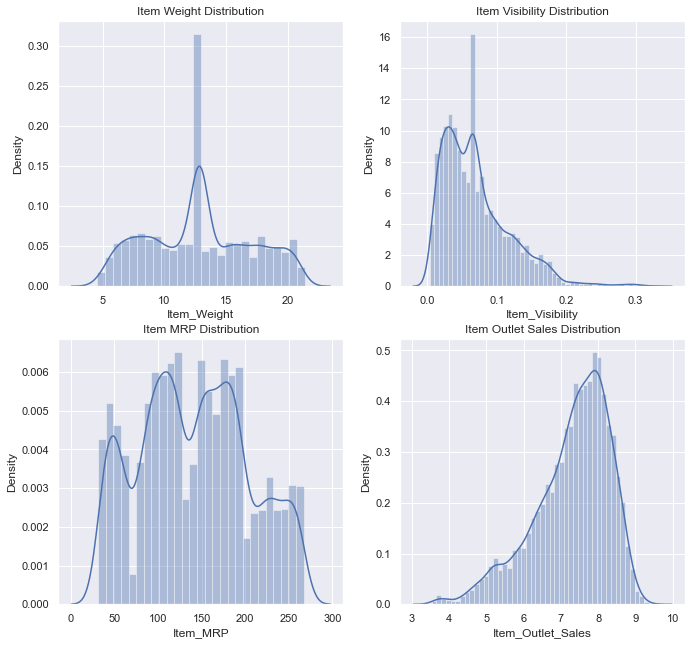

In [227]:
# fig, axes = plt.subplots(2, 2)
# fig.suptitle('3 rows x 4 columns axes with no data')
from pylab import *
sns.set(rc={"figure.figsize": (10,10)})
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])
subplot(2,2,1)
sns.distplot(df['Item_Weight'],label ='Item_Weight')
plt.title("Item Weight Distribution")
subplot(2,2,2)
sns.distplot(df['Item_Visibility'])
plt.title("Item Visibility Distribution")
subplot(2,2,3)
sns.distplot(df['Item_MRP'])
plt.title("Item MRP Distribution")
subplot(2,2,4)
sns.distplot(df['Item_Outlet_Sales'])
plt.title("Item Outlet Sales Distribution")

Text(0.5, 1.0, 'Outlet Type Count')

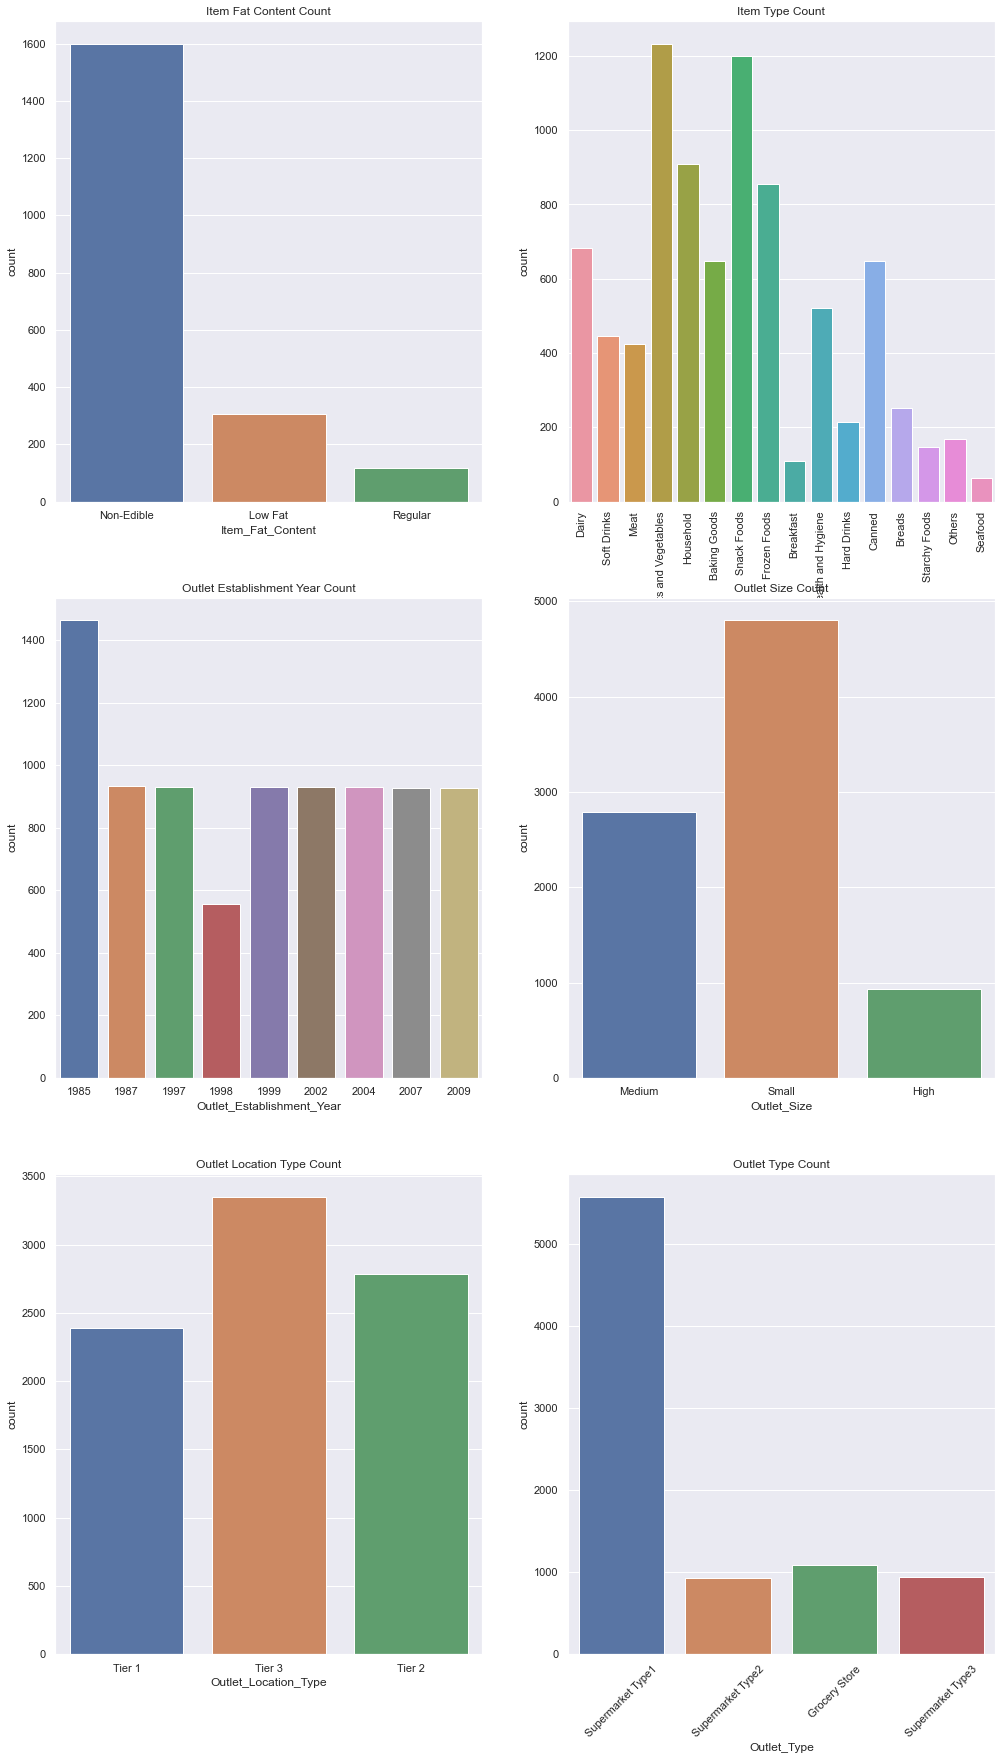

In [163]:
from pylab import *
sns.set(rc={"figure.figsize": (15,28)})
subplot(3,2,1)
sns.countplot(df["Item_Fat_Content"])
plt.title("Item Fat Content Count")
subplot(3,2,2)
labels= list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=labels, rotation=90)
plt.title("Item Type Count")
subplot(3,2,3)
sns.countplot(df['Outlet_Establishment_Year'])
plt.title("Outlet Establishment Year Count")
subplot(3,2,4)
sns.countplot(df['Outlet_Size'])
plt.title("Outlet Size Count")
subplot(3,2,5)
sns.countplot(df['Outlet_Location_Type'])
plt.title("Outlet Location Type Count")
subplot(3,2,6)
labels = list(df['Outlet_Type'].unique())
w=sns.countplot(df['Outlet_Type'])
w.set_xticklabels(labels=labels, rotation=45)
plt.title("Outlet Type Count")

<AxesSubplot:>

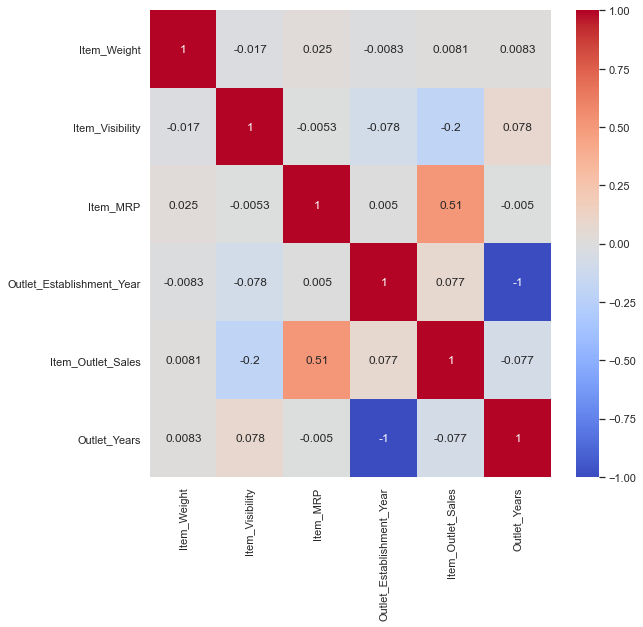

In [164]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize": (8,8)})
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

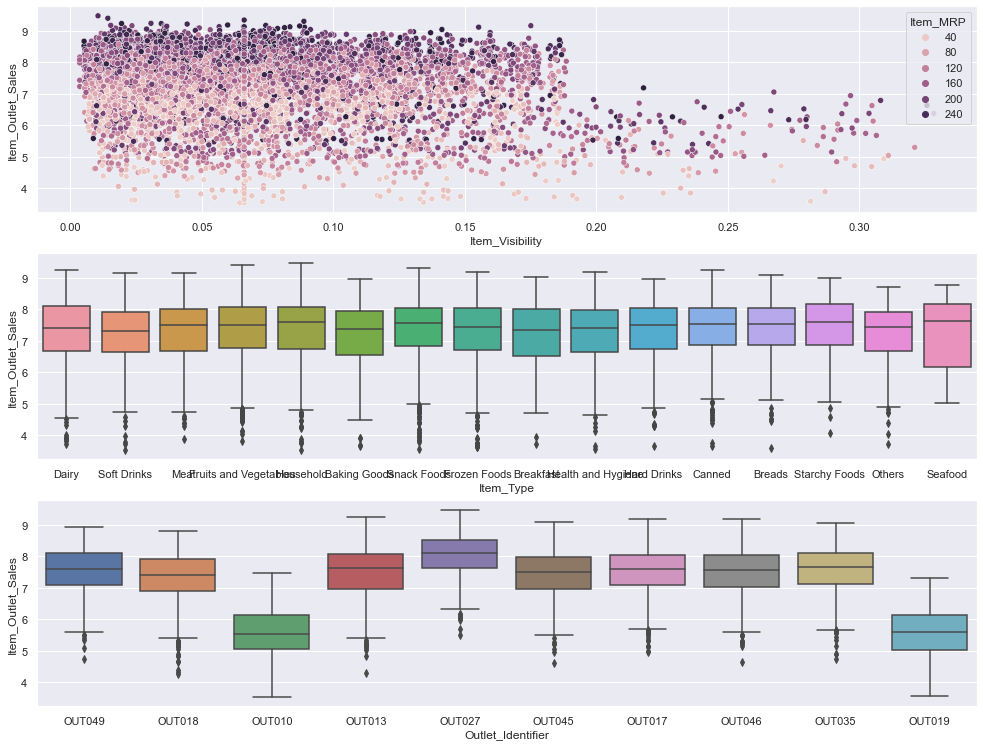

In [165]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=df)

array([[<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>],
       [<AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_Weight'}>],
       [<AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
        <AxesSubplot:title={'center':'Outlet_Years'}>]], dtype=object)

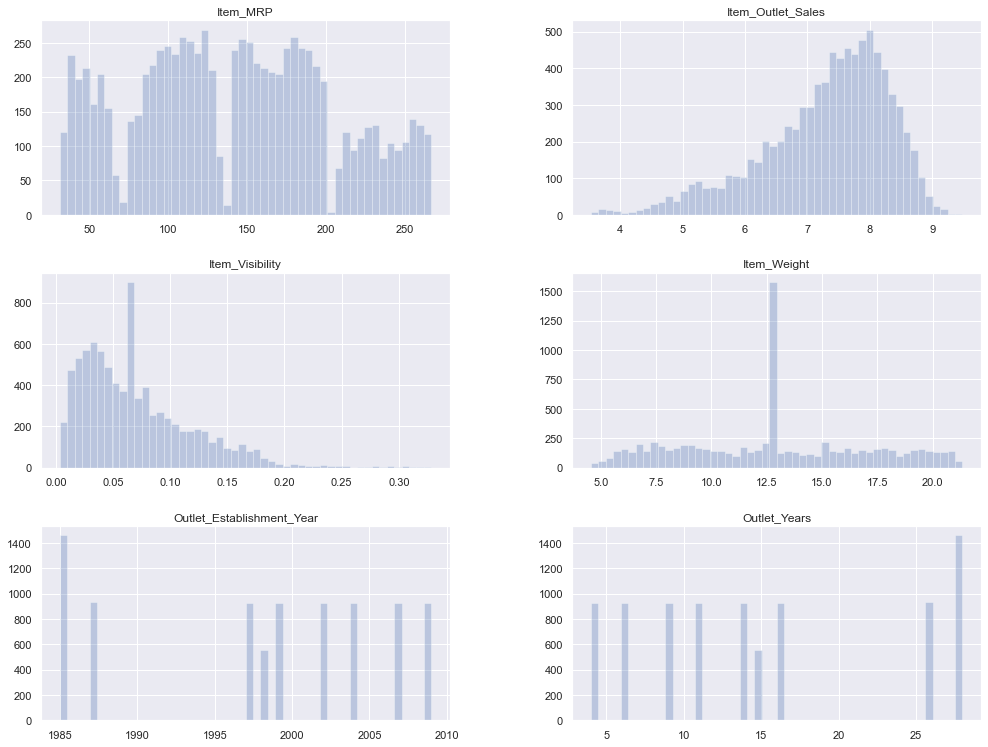

In [166]:
df.hist(figsize=(15,12),alpha = 0.3,bins = 50)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

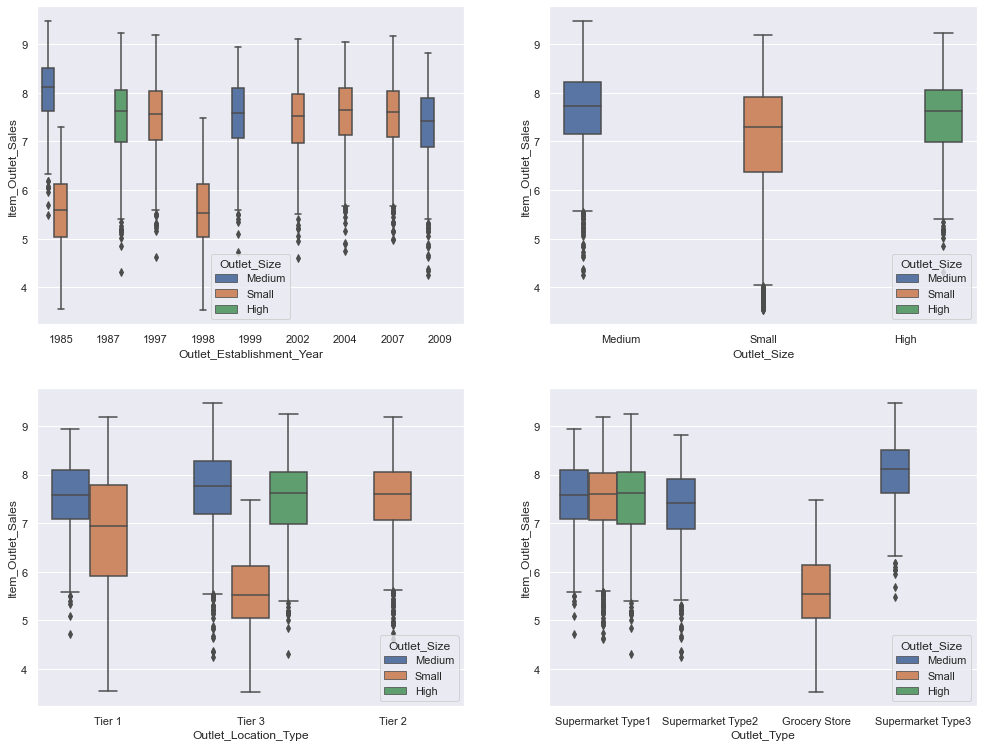

In [167]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=df)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

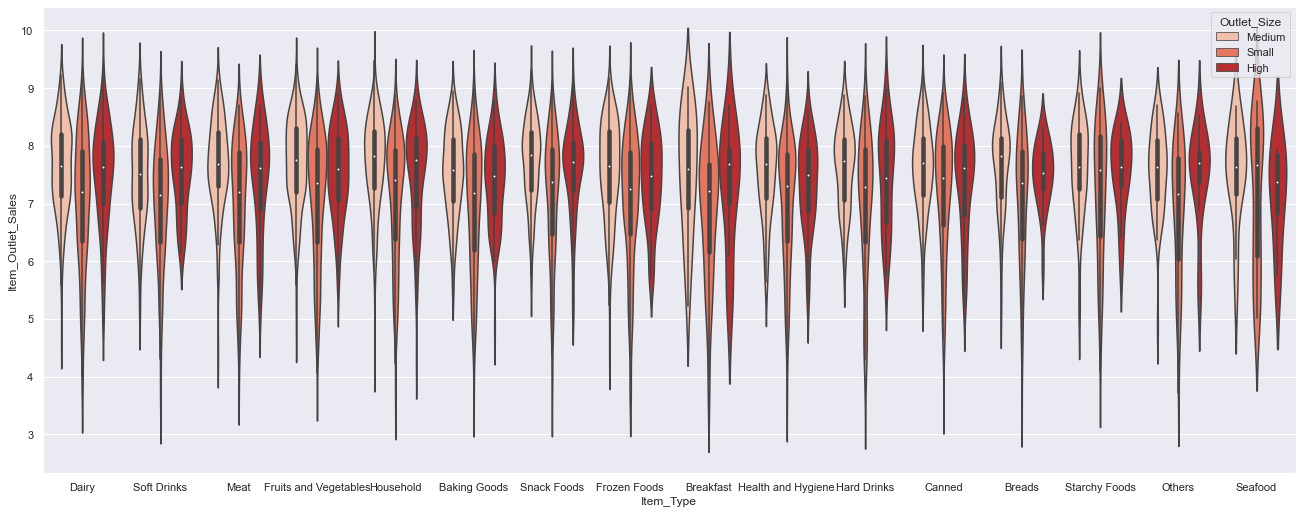

In [168]:
sns.set(rc={"figure.figsize": (20,8)})
sns.violinplot(x=df['Item_Type'],y=df['Item_Outlet_Sales'],hue = df["Outlet_Size"],palette = "Reds")

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

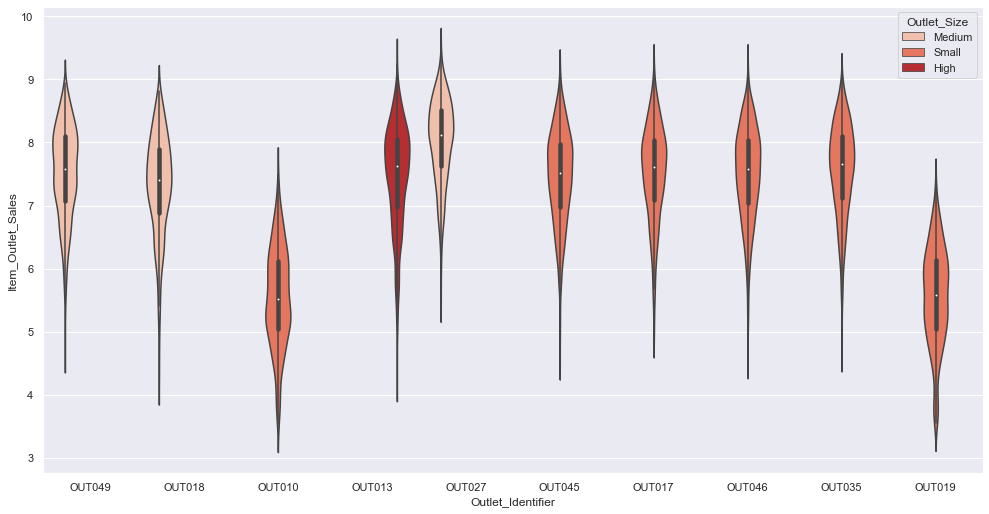

In [169]:
sns.set(rc={"figure.figsize": (15,8)})
sns.violinplot(x=df['Outlet_Identifier'],y=df['Item_Outlet_Sales'],hue = df["Outlet_Size"],palette = "Reds")

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

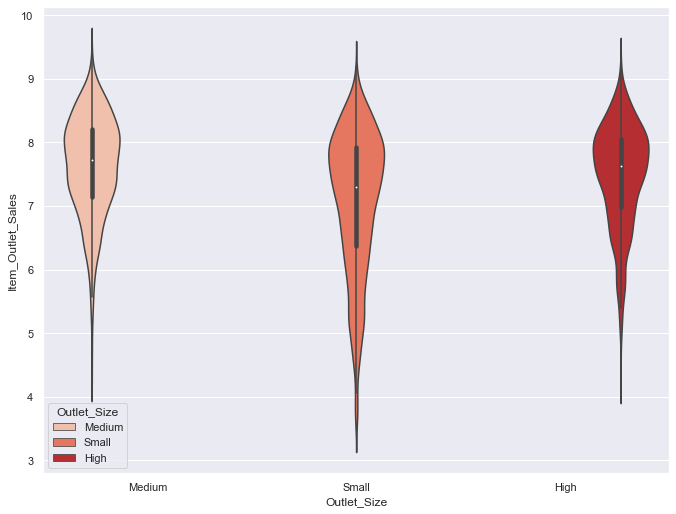

In [170]:
sns.set(rc={"figure.figsize": (10,8)})
sns.violinplot(x=df["Outlet_Size"],y=df["Item_Outlet_Sales"],hue = df["Outlet_Size"],palette = "Reds")

# Machine Learning Application

In [228]:
#LabelEncoder-converts labels into numerics
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Cat']
for col in cat_col:
    df[col] = le.fit_transform(df[col])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Cat,Outlet_Years,Outlet
0,FDA15,9.30,3,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.92,3,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,4,3
2,FDN15,17.50,3,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,14,9
3,FDX07,19.20,3,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,15,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,26,1


In [229]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Cat'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Cat_0,New_Item_Cat_1,New_Item_Cat_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


In [273]:
#  training the dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error
from sklearn.model_selection import cross_val_score
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

## Linear regression

In [274]:
model = LinearRegression(normalize=True)
#model training
model.fit(x_train,y_train)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_train= min_max_scaler.fit_transform(x_train)
# x_test= min_max_scaler.transform(x_test)
# print(len(x_train),len(x_test))

LinearRegression(normalize=True)

In [275]:
#model prediction
predictions=model.predict(x_test)
print('Intercept:',model.intercept_)
print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

Intercept: -5783473341605.873
Coefficient: [ 1.36552213e-03  2.91817438e-02 -1.30994024e-03  8.30825740e-03
 -7.67175142e-02  6.28290759e-02  6.90682723e+11  4.41915194e+12
  6.90682723e+11  6.90682723e+11  3.70932668e+11  3.70932668e+11
  3.70932668e+11 -1.26687180e+12 -1.26687180e+12 -1.26687180e+12
 -5.48551830e+12 -5.48551830e+12 -5.48551830e+12 -5.48551830e+12
  1.14742481e+13  1.14742481e+13  7.74577883e+12]
[7.03515625 7.5703125  5.57421875 ... 6.6171875  6.97851562 7.49316406]
7452    6.238978
2526    8.282951
4656    6.087747
5781    8.006067
8446    6.237677
          ...   
3974    7.092382
4842    8.018641
6264    5.744907
3933    7.731653
7405    7.243642
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [276]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, predictions)
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, predictions)
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    r2=metrics.r2_score(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('Regression Report')
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

Regression Report
explained_variance:  0.7161
mean_squared_log_error:  0.0047
r2:  0.716
MSE:  0.287
RMSE:  0.5357
MAE:  0.4133
CV Score: 0.2928088527238756


<AxesSubplot:title={'center':'Model Coefficients'}>

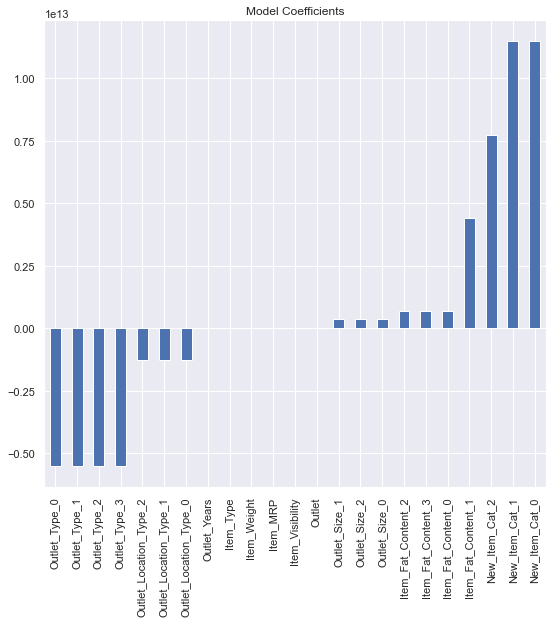

In [277]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize": (8,8)})
coef = pd.Series(model.coef_, x_train.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

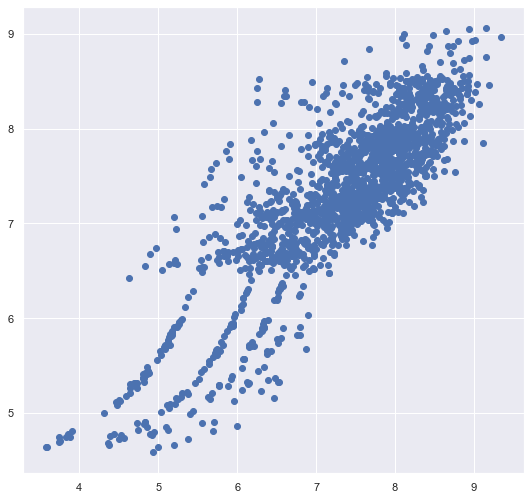

In [278]:
plt.scatter(y_test, predictions)

Text(0.5, 1.0, 'Linear Regression \n RMSE: 0.54')

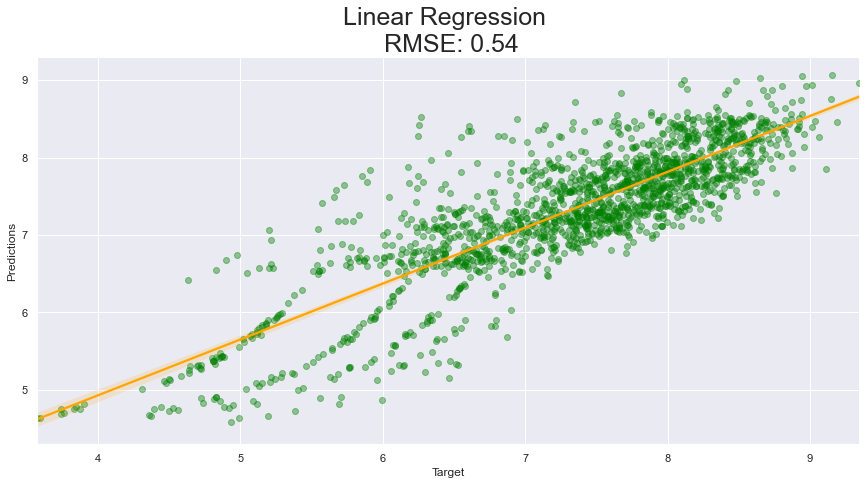

In [279]:
reg=pd.DataFrame()
reg['Target']=y_test
reg['Predictions']=predictions
mse=metrics.mean_squared_error(y_test, predictions)
rsme=round(np.sqrt(mse),4)
sns.lmplot('Target','Predictions',data=reg,height=6,aspect=2,line_kws={'color':'orange'},scatter_kws={'alpha':0.4,'color':'green'})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(rsme),size=25)

## Ridge Regression

In [280]:
model = Ridge(normalize=True)
#model training
model.fit(x_train,y_train)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_train= min_max_scaler.fit_transform(x_train)
# x_test= min_max_scaler.transform(x_test)
# print(len(x_train),len(x_test))

Ridge(normalize=True)

In [281]:
#model prediction
predictions=model.predict(x_test)
print('Intercept:',model.intercept_)
print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

Intercept: 6.593671416949295
Coefficient: [ 6.67798299e-04 -8.25449257e-01  1.21315130e-03  4.14794251e-03
 -1.94890681e-03  2.73985644e-02  1.78757354e-02 -3.08749332e-03
 -4.49940077e-02  2.65483379e-03  7.66811267e-02  1.25307611e-01
 -1.42337615e-01 -1.09721480e-01  1.07539050e-01 -6.60804002e-03
 -7.36244607e-01  2.05666899e-01  9.91548226e-03  3.52244049e-01
 -3.37503414e-02  1.66785709e-02 -3.08749332e-03]
[7.04813756 7.38833278 6.14096914 ... 7.1559365  7.16439372 7.35209339]
7452    6.238978
2526    8.282951
4656    6.087747
5781    8.006067
8446    6.237677
          ...   
3974    7.092382
4842    8.018641
6264    5.744907
3933    7.731653
7405    7.243642
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [282]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, predictions)
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, predictions)
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    r2=metrics.r2_score(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('Regression Report')
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

Regression Report
explained_variance:  0.5846
mean_squared_log_error:  0.0072
r2:  0.5846
MSE:  0.4198
RMSE:  0.6479
MAE:  0.5156
CV Score: 0.42436172384808213


<AxesSubplot:title={'center':'Model Coefficients'}>

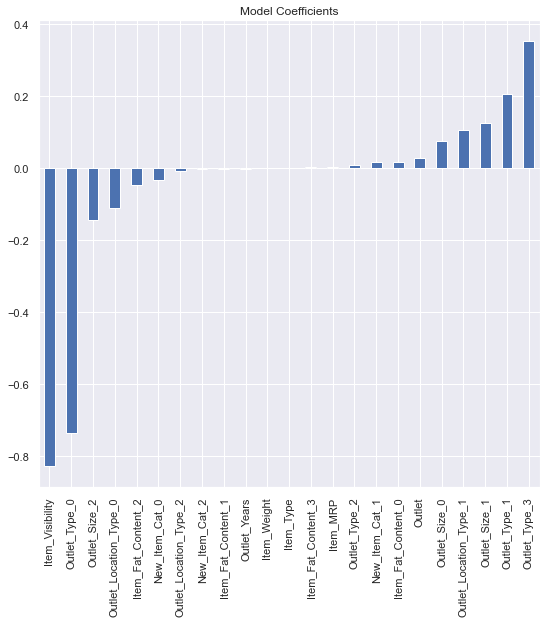

In [283]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize": (8,8)})
coef = pd.Series(model.coef_, x_train.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

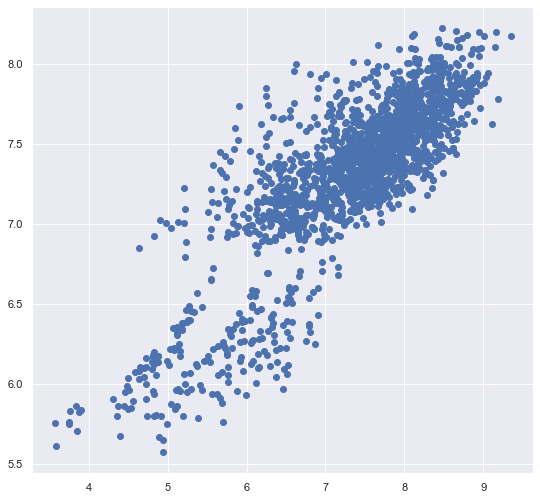

In [284]:
plt.scatter(y_test, predictions)

Text(0.5, 1.0, 'Ridge Regression \n RMSE: 0.65')

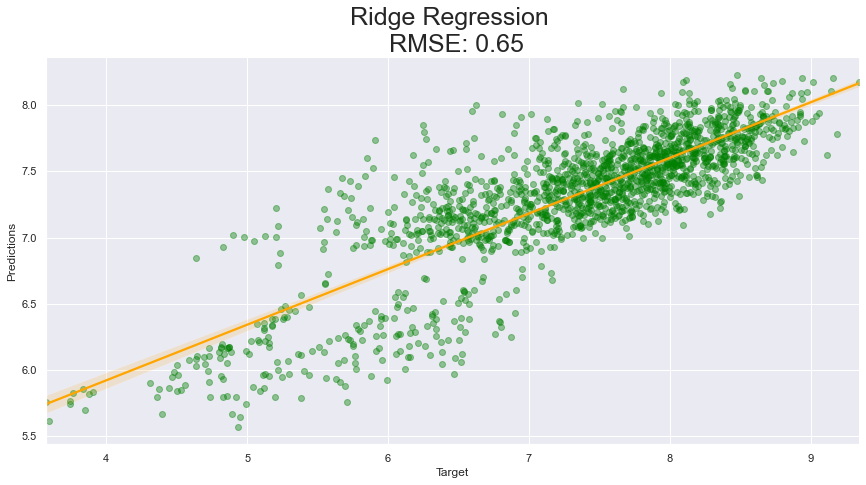

In [285]:
reg=pd.DataFrame()
reg['Target']=y_test
reg['Predictions']=predictions
mse=metrics.mean_squared_error(y_test, predictions)
rsme=round(np.sqrt(mse),4)
sns.lmplot('Target','Predictions',data=reg,height=6,aspect=2,line_kws={'color':'orange'},scatter_kws={'alpha':0.4,'color':'green'})
plt.title('Ridge Regression \n RMSE: {0:.2f}'.format(rsme),size=25)

## Lasso Model

In [286]:
model = Lasso()
#model training
model.fit(x_train,y_train)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_train= min_max_scaler.fit_transform(x_train)
# x_test= min_max_scaler.transform(x_test)
# print(len(x_train),len(x_test))

Lasso()

In [287]:
#model prediction
predictions=model.predict(x_test)
print('Intercept:',model.intercept_)
print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

Intercept: 6.159960858330178
Coefficient: [-0.        -0.        -0.         0.0080755 -0.         0.
  0.        -0.        -0.         0.         0.         0.
 -0.        -0.         0.        -0.        -0.         0.
  0.         0.        -0.         0.        -0.       ]
[6.85786533 7.32829253 7.34363599 ... 6.44116284 6.78229476 7.28906173]
7452    6.238978
2526    8.282951
4656    6.087747
5781    8.006067
8446    6.237677
          ...   
3974    7.092382
4842    8.018641
6264    5.744907
3933    7.731653
7405    7.243642
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [288]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, predictions)
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, predictions)
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    r2=metrics.r2_score(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('Regression Report')
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

Regression Report
explained_variance:  0.26
mean_squared_log_error:  0.013
r2:  0.26
MSE:  0.7478
RMSE:  0.8648
MAE:  0.6558
CV Score: 0.7493042223420173


<AxesSubplot:title={'center':'Model Coefficients'}>

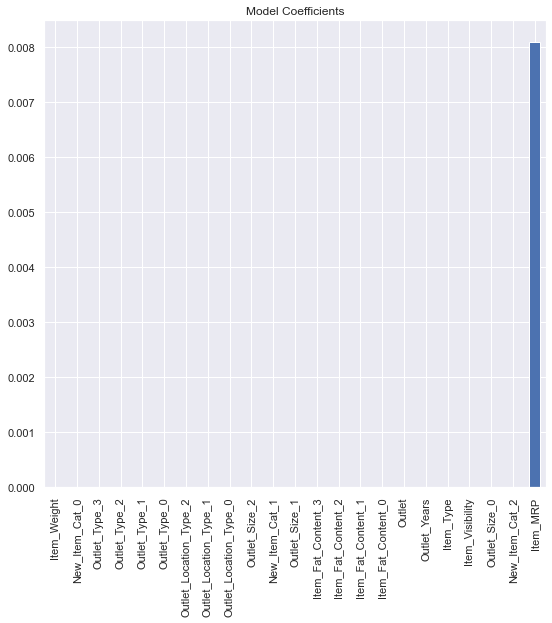

In [289]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize": (8,8)})
coef = pd.Series(model.coef_, x_train.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

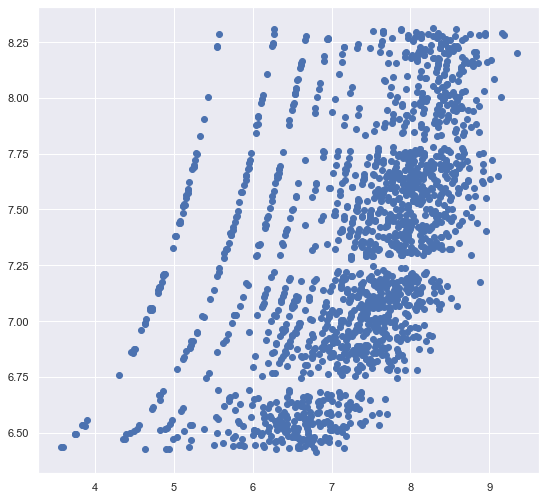

In [290]:
plt.scatter(y_test, predictions)

Text(0.5, 1.0, 'Lasso Regression \n RMSE: 0.86')

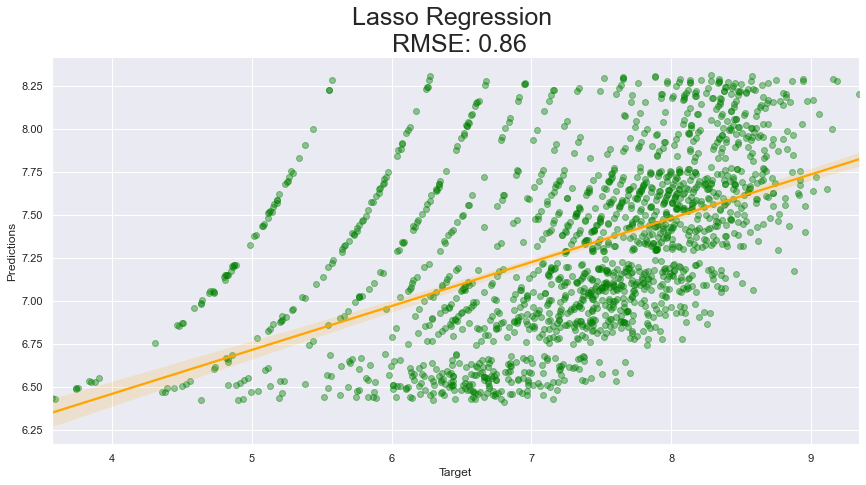

In [291]:
reg=pd.DataFrame()
reg['Target']=y_test
reg['Predictions']=predictions
mse=metrics.mean_squared_error(y_test, predictions)
rsme=round(np.sqrt(mse),4)
sns.lmplot('Target','Predictions',data=reg,height=6,aspect=2,line_kws={'color':'orange'},scatter_kws={'alpha':0.4,'color':'green'})
plt.title('Lasso Regression \n RMSE: {0:.2f}'.format(rsme),size=25)

## Decision Tree Regressor

In [292]:
model = DecisionTreeRegressor()
#model training
model.fit(x_train,y_train)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_train= min_max_scaler.fit_transform(x_train)
# x_test= min_max_scaler.transform(x_test)
# print(len(x_train),len(x_test))

DecisionTreeRegressor()

In [294]:
#model prediction
predictions=model.predict(x_test)
# print('Intercept:',model.intercept_)
# print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

[7.39360273 7.86388761 4.99366545 ... 6.25445169 6.92134433 7.98520454]
7452    6.238978
2526    8.282951
4656    6.087747
5781    8.006067
8446    6.237677
          ...   
3974    7.092382
4842    8.018641
6264    5.744907
3933    7.731653
7405    7.243642
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [295]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, predictions)
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, predictions)
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    r2=metrics.r2_score(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('Regression Report')
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

Regression Report
explained_variance:  0.4585
mean_squared_log_error:  0.0088
r2:  0.4585
MSE:  0.5472
RMSE:  0.7397
MAE:  0.5667
CV Score: 0.5571134234210724


In [299]:
# plt.style.use('fivethirtyeight')
# sns.set(rc={"figure.figsize": (8,8)})
# coef = pd.Series(model.coef_, x_train.columns).sort_values()
# coef.plot(kind='bar', title="Model Coefficients")

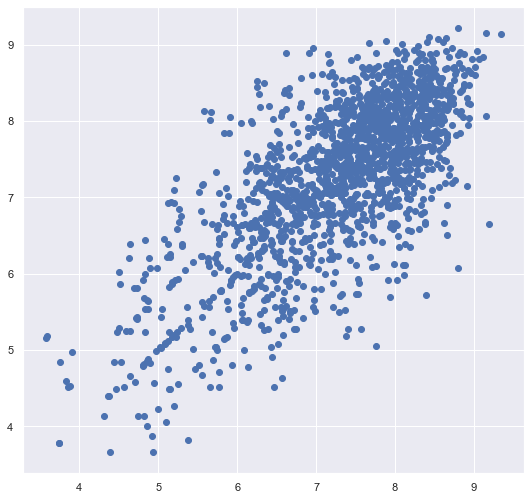

In [297]:
plt.scatter(y_test, predictions)

Text(0.5, 1.0, 'Decision Tree Regression \n RMSE: 0.74')

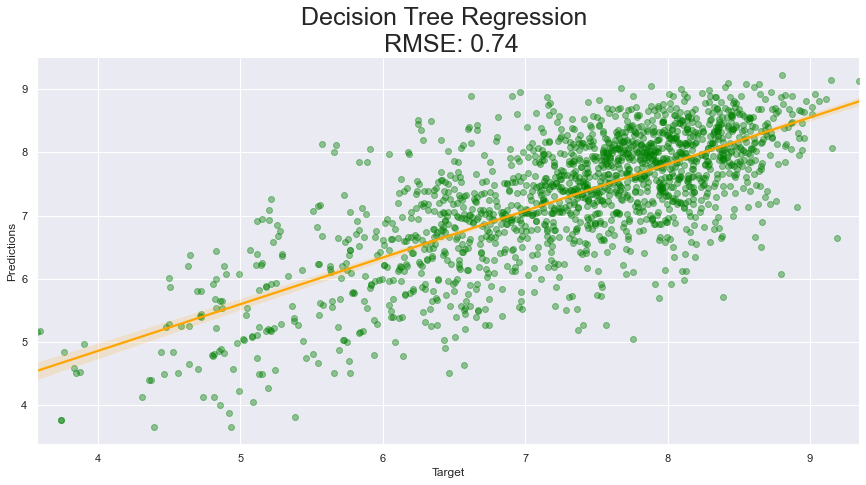

In [298]:
reg=pd.DataFrame()
reg['Target']=y_test
reg['Predictions']=predictions
mse=metrics.mean_squared_error(y_test, predictions)
rsme=round(np.sqrt(mse),4)
sns.lmplot('Target','Predictions',data=reg,height=6,aspect=2,line_kws={'color':'orange'},scatter_kws={'alpha':0.4,'color':'green'})
plt.title('Decision Tree Regression \n RMSE: {0:.2f}'.format(rsme),size=25)

## Random Forest Regressor

In [300]:
model = RandomForestRegressor()
#model training
model.fit(x_train,y_train)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_train= min_max_scaler.fit_transform(x_train)
# x_test= min_max_scaler.transform(x_test)
# print(len(x_train),len(x_test))

RandomForestRegressor()

In [303]:
#model prediction
predictions=model.predict(x_test)
# print('Intercept:',model.intercept_)
# print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

[7.17298255 7.79860712 5.35876927 ... 6.11688884 6.7858613  7.44145604]
7452    6.238978
2526    8.282951
4656    6.087747
5781    8.006067
8446    6.237677
          ...   
3974    7.092382
4842    8.018641
6264    5.744907
3933    7.731653
7405    7.243642
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [304]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, predictions)
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, predictions)
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    r2=metrics.r2_score(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('Regression Report')
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

Regression Report
explained_variance:  0.7093
mean_squared_log_error:  0.0048
r2:  0.7092
MSE:  0.2939
RMSE:  0.5421
MAE:  0.4245
CV Score: 0.30500637083843807


In [305]:
# plt.style.use('fivethirtyeight')
# sns.set(rc={"figure.figsize": (8,8)})
# coef = pd.Series(model.coef_, x_train.columns).sort_values()
# coef.plot(kind='bar', title="Model Coefficients")

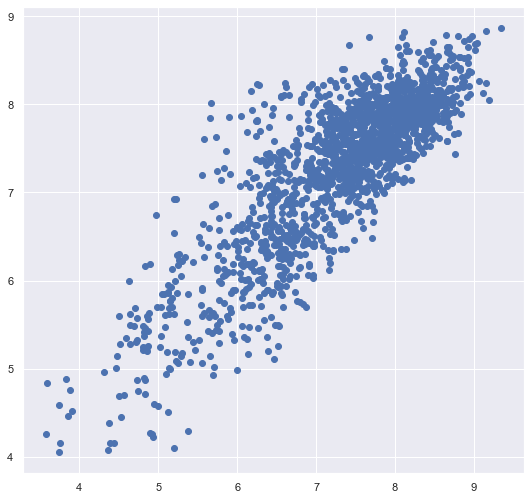

In [306]:
plt.scatter(y_test, predictions)

Text(0.5, 1.0, 'Random Forest Regression \n RMSE: 0.54')

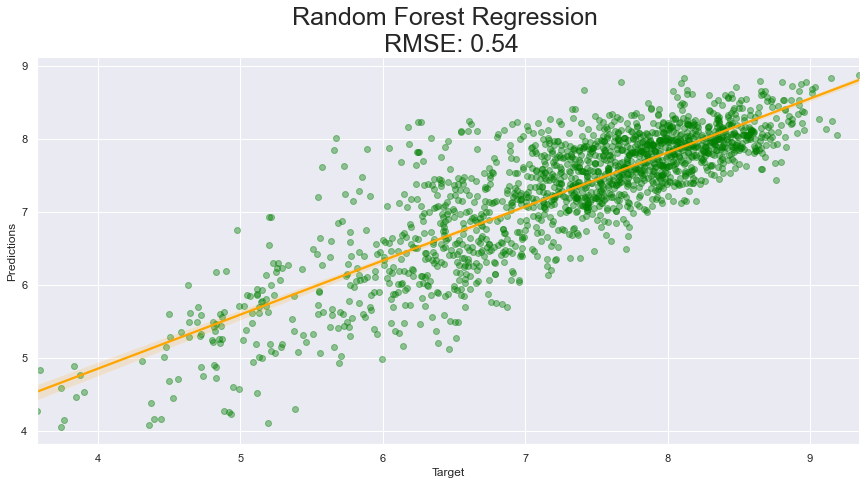

In [308]:
reg=pd.DataFrame()
reg['Target']=y_test
reg['Predictions']=predictions
mse=metrics.mean_squared_error(y_test, predictions)
rsme=round(np.sqrt(mse),4)
sns.lmplot('Target','Predictions',data=reg,height=6,aspect=2,line_kws={'color':'orange'},scatter_kws={'alpha':0.4,'color':'green'})
plt.title('Random Forest Regression \n RMSE: {0:.2f}'.format(rsme),size=25)

## Extra trees Regressor

In [309]:
model = ExtraTreesRegressor()
#model training
model.fit(x_train,y_train)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_train= min_max_scaler.fit_transform(x_train)
# x_test= min_max_scaler.transform(x_test)
# print(len(x_train),len(x_test))

ExtraTreesRegressor()

In [311]:
#model prediction
predictions=model.predict(x_test)
# print('Intercept:',model.intercept_)
# print('Coefficient:', model.coef_)
print(predictions)
print(y_test)

[7.24702468 7.97098143 5.43424884 ... 6.28647267 6.57228072 7.36129489]
7452    6.238978
2526    8.282951
4656    6.087747
5781    8.006067
8446    6.237677
          ...   
3974    7.092382
4842    8.018641
6264    5.744907
3933    7.731653
7405    7.243642
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [312]:
import sklearn.metrics as metrics
def regression_results(y_test, predictions):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, predictions)
    mean_absolute_error=metrics.mean_absolute_error(y_test, predictions) 
    mse=metrics.mean_squared_error(y_test, predictions) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, predictions)
    median_absolute_error=metrics.median_absolute_error(y_test, predictions)
    r2=metrics.r2_score(y_test, predictions)
    cv_score = cross_val_score(model, x_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('Regression Report')
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mean_absolute_error,4))
    print("CV Score:", cv_score)

regression_results(y_test, predictions)

Regression Report
explained_variance:  0.6915
mean_squared_log_error:  0.005
r2:  0.6913
MSE:  0.312
RMSE:  0.5586
MAE:  0.4326
CV Score: 0.33054237172614676


In [313]:
# plt.style.use('fivethirtyeight')
# sns.set(rc={"figure.figsize": (8,8)})
# coef = pd.Series(model.coef_, x_train.columns).sort_values()
# coef.plot(kind='bar', title="Model Coefficients")

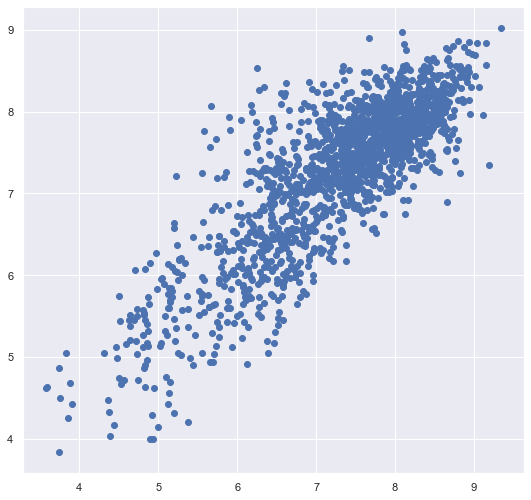

In [314]:
plt.scatter(y_test, predictions)

Text(0.5, 1.0, 'Extra trees Regression \n RMSE: 0.56')

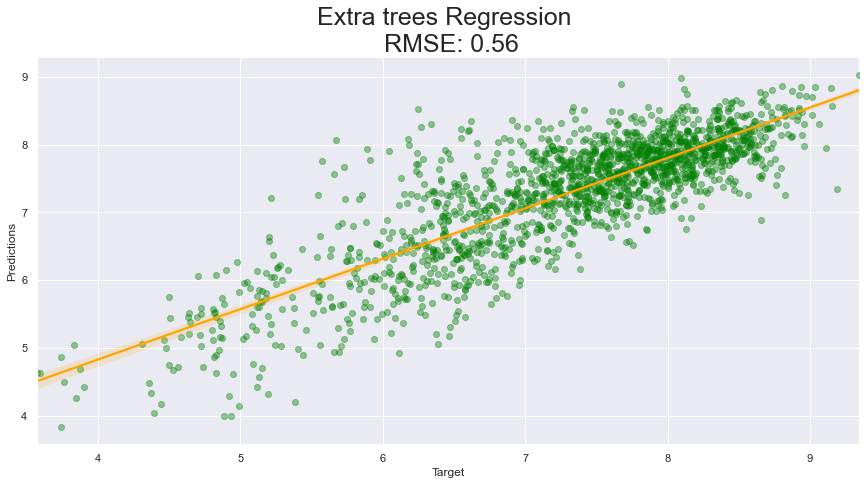

In [315]:
reg=pd.DataFrame()
reg['Target']=y_test
reg['Predictions']=predictions
mse=metrics.mean_squared_error(y_test, predictions)
rsme=round(np.sqrt(mse),4)
sns.lmplot('Target','Predictions',data=reg,height=6,aspect=2,line_kws={'color':'orange'},scatter_kws={'alpha':0.4,'color':'green'})
plt.title('Extra trees Regression \n RMSE: {0:.2f}'.format(rsme),size=25)